In [129]:
import numpy as np

def euclidean_distance(x, y):
    return np.linalg.norm((x-y), ord = 2)

def manhattan_distance(x, y):
    return np.linalg.norm((x-y), ord = 1)

def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
            
    return correct/len(y_true)
        
def generalization_error(y_true, y_pred):
    return 1 - accuracy(y_true, y_pred)
    
def precision(y_true, y_pred):
    tp = 0
    fp = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        if y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
            
    return tp/(fp+tp)

def recall(y_true, y_pred):
    tp = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        if y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    
    return tp/(fn+tp)
    
def f1_score(y_true, y_pred):
    return 2*((precision(y_true, y_pred)*recall(y_true, y_pred))/(precision(y_true, y_pred)+recall(y_true, y_pred)))

def confusion_matrix(y_true, y_pred):
    tps = int(np.matmul(y_test, y_pred))
    fps = int((sum(y_pred) - tps))
    fns = int((sum(y_test) - tps))
    tns = int((len(y_test) - tps - fns - fps))
    
    cm = np.array([[tns, fps], [fns, tps]])
    
    return cm



def roc(y_train, y_scores):
    thresholds = np.array(np.arange(0, 1, .001))
    thresholds = np.append(thresholds, [1,2], axis = 0)
    thresholds = np.flip(thresholds, axis = 0)
    fp = []
    tp = []
    
    for threshold in thresholds:
        tps = 0
        fps = 0
        fns = 0
        tns = 0
        for i in range(len(y_train)):
            if y_train[i] == 1 and y_scores[i] >= threshold:
                tps += 1
                
            if y_train[i] == 1 and y_scores[i] < threshold:
                fns += 1
                        
            if y_train[i] == 0 and y_scores[i] < threshold:
                tns += 1
                
            if y_train[i] == 0 and y_scores[i] >= threshold:
                fps += 1
                
        fpr = fps/(tns+fps)
        tpr = tps/(tps+fns)
        
        fp.append(fpr)
        tp.append(tpr)
        
    return tp, fp

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def get_y_scores(model, X_train, y_train):
    
    y_scores = np.zeros(len(X_train))
            
    for i in range(len(X_train)):
        distances = []
        if model.distance_f == "euclid":
            for j,v in enumerate(model.training_features):
                    distances.append([euclidean_distance(X_train[i], v), y_train[j]])
            
        if model.distance_f == "manhattan":
            for j,v in enumerate(model.training_features):
                    distances.append([manhattan_distance(X_train[i], v), y_train[j]])
                    
        distances.sort()
        nearest = distances[0:model.n_neighbors]
        avg = 0
        for k in range(len(nearest)):
            avg += nearest[k][1]
        avg = avg/model.n_neighbors
            
        y_scores[i] = avg
                
    return y_scores

def auc_score(y_train, y_scores):
    thresholds = np.array(np.arange(0, 1, .001))
    thresholds = np.append(thresholds, [1,2], axis = 0)
    thresholds = np.flip(thresholds, axis = 0)
    fp = []
    tp = []
    
    for threshold in thresholds:
        tps = 0
        fps = 0
        fns = 0
        tns = 0
        for i in range(len(y_train)):
            if y_train[i] == 1 and y_scores[i] >= threshold:
                tps += 1
                
            if y_train[i] == 1 and y_scores[i] < threshold:
                fns += 1
                        
            if y_train[i] == 0 and y_scores[i] < threshold:
                tns += 1
                
            if y_train[i] == 0 and y_scores[i] >= threshold:
                fps += 1
                
        fpr = fps/(tns+fps)
        tpr = tps/(tps+fns)
        
        fp.append(fpr)
        tp.append(tpr)
    
    area = 0
    for i in range(len(fp)-1):
        area += (fp[i+1]-fp[i])*(tp[i]+tp[i+1])/2
        
    return area
    
class KNN:
    
    def __init__(self):
        pass
    
    def fit(self, training_features, training_labels, k, distance_f):
        
        self.training_features = training_features
        self.training_labels = training_labels
        self.n_neighbors = k
        self.distance_f = distance_f
        
    def predict(self, test_features):
        y_pred = np.zeros(len(test_features))
            
        for i in range(len(test_features)):
            distances = []
            if self.distance_f == "euclid":
                for j,v in enumerate(self.training_features):
                    distances.append([euclidean_distance(test_features[i], v), self.training_labels[j]])
                    
                    
            if self.distance_f == "manhattan":
                for j,v in enumerate(self.training_features):
                    distances.append([manhattan_distance(test_features[i], v), self.training_labels[j]])
                    
                
            distances.sort(key=lambda tup: tup[0])
            nearest = distances[0:self.n_neighbors]
            avg = 0
            for k in range(len(nearest)):
                avg += nearest[k][1]
            if (avg/len(nearest)) >= .5:
                y_pred[i] = 1
            
            else:
                y_pred[i] = 0            
        
        return y_pred
            
    
def partition(X, y, test_size):

    indices = np.random.permutation(X.shape[0])
    
    train_idx = indices[:int(np.round(test_size*len(X), decimals = 0))]
    test_idx = indices[int(np.round(test_size*len(X), decimals = 0)):]
    
    X_train = X[train_idx, :]
    y_train = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    
    return X_train, X_test, y_train, y_test


In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/Henry/CSCE 478/Datasets/DataScienceRepository/winequality-white.csv')

In [3]:
df['quality'] = np.where(df['quality'] > 5, 1, 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,1
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,1


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [5]:
df = df.sample(frac = 1)

C:\Users\Henry\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


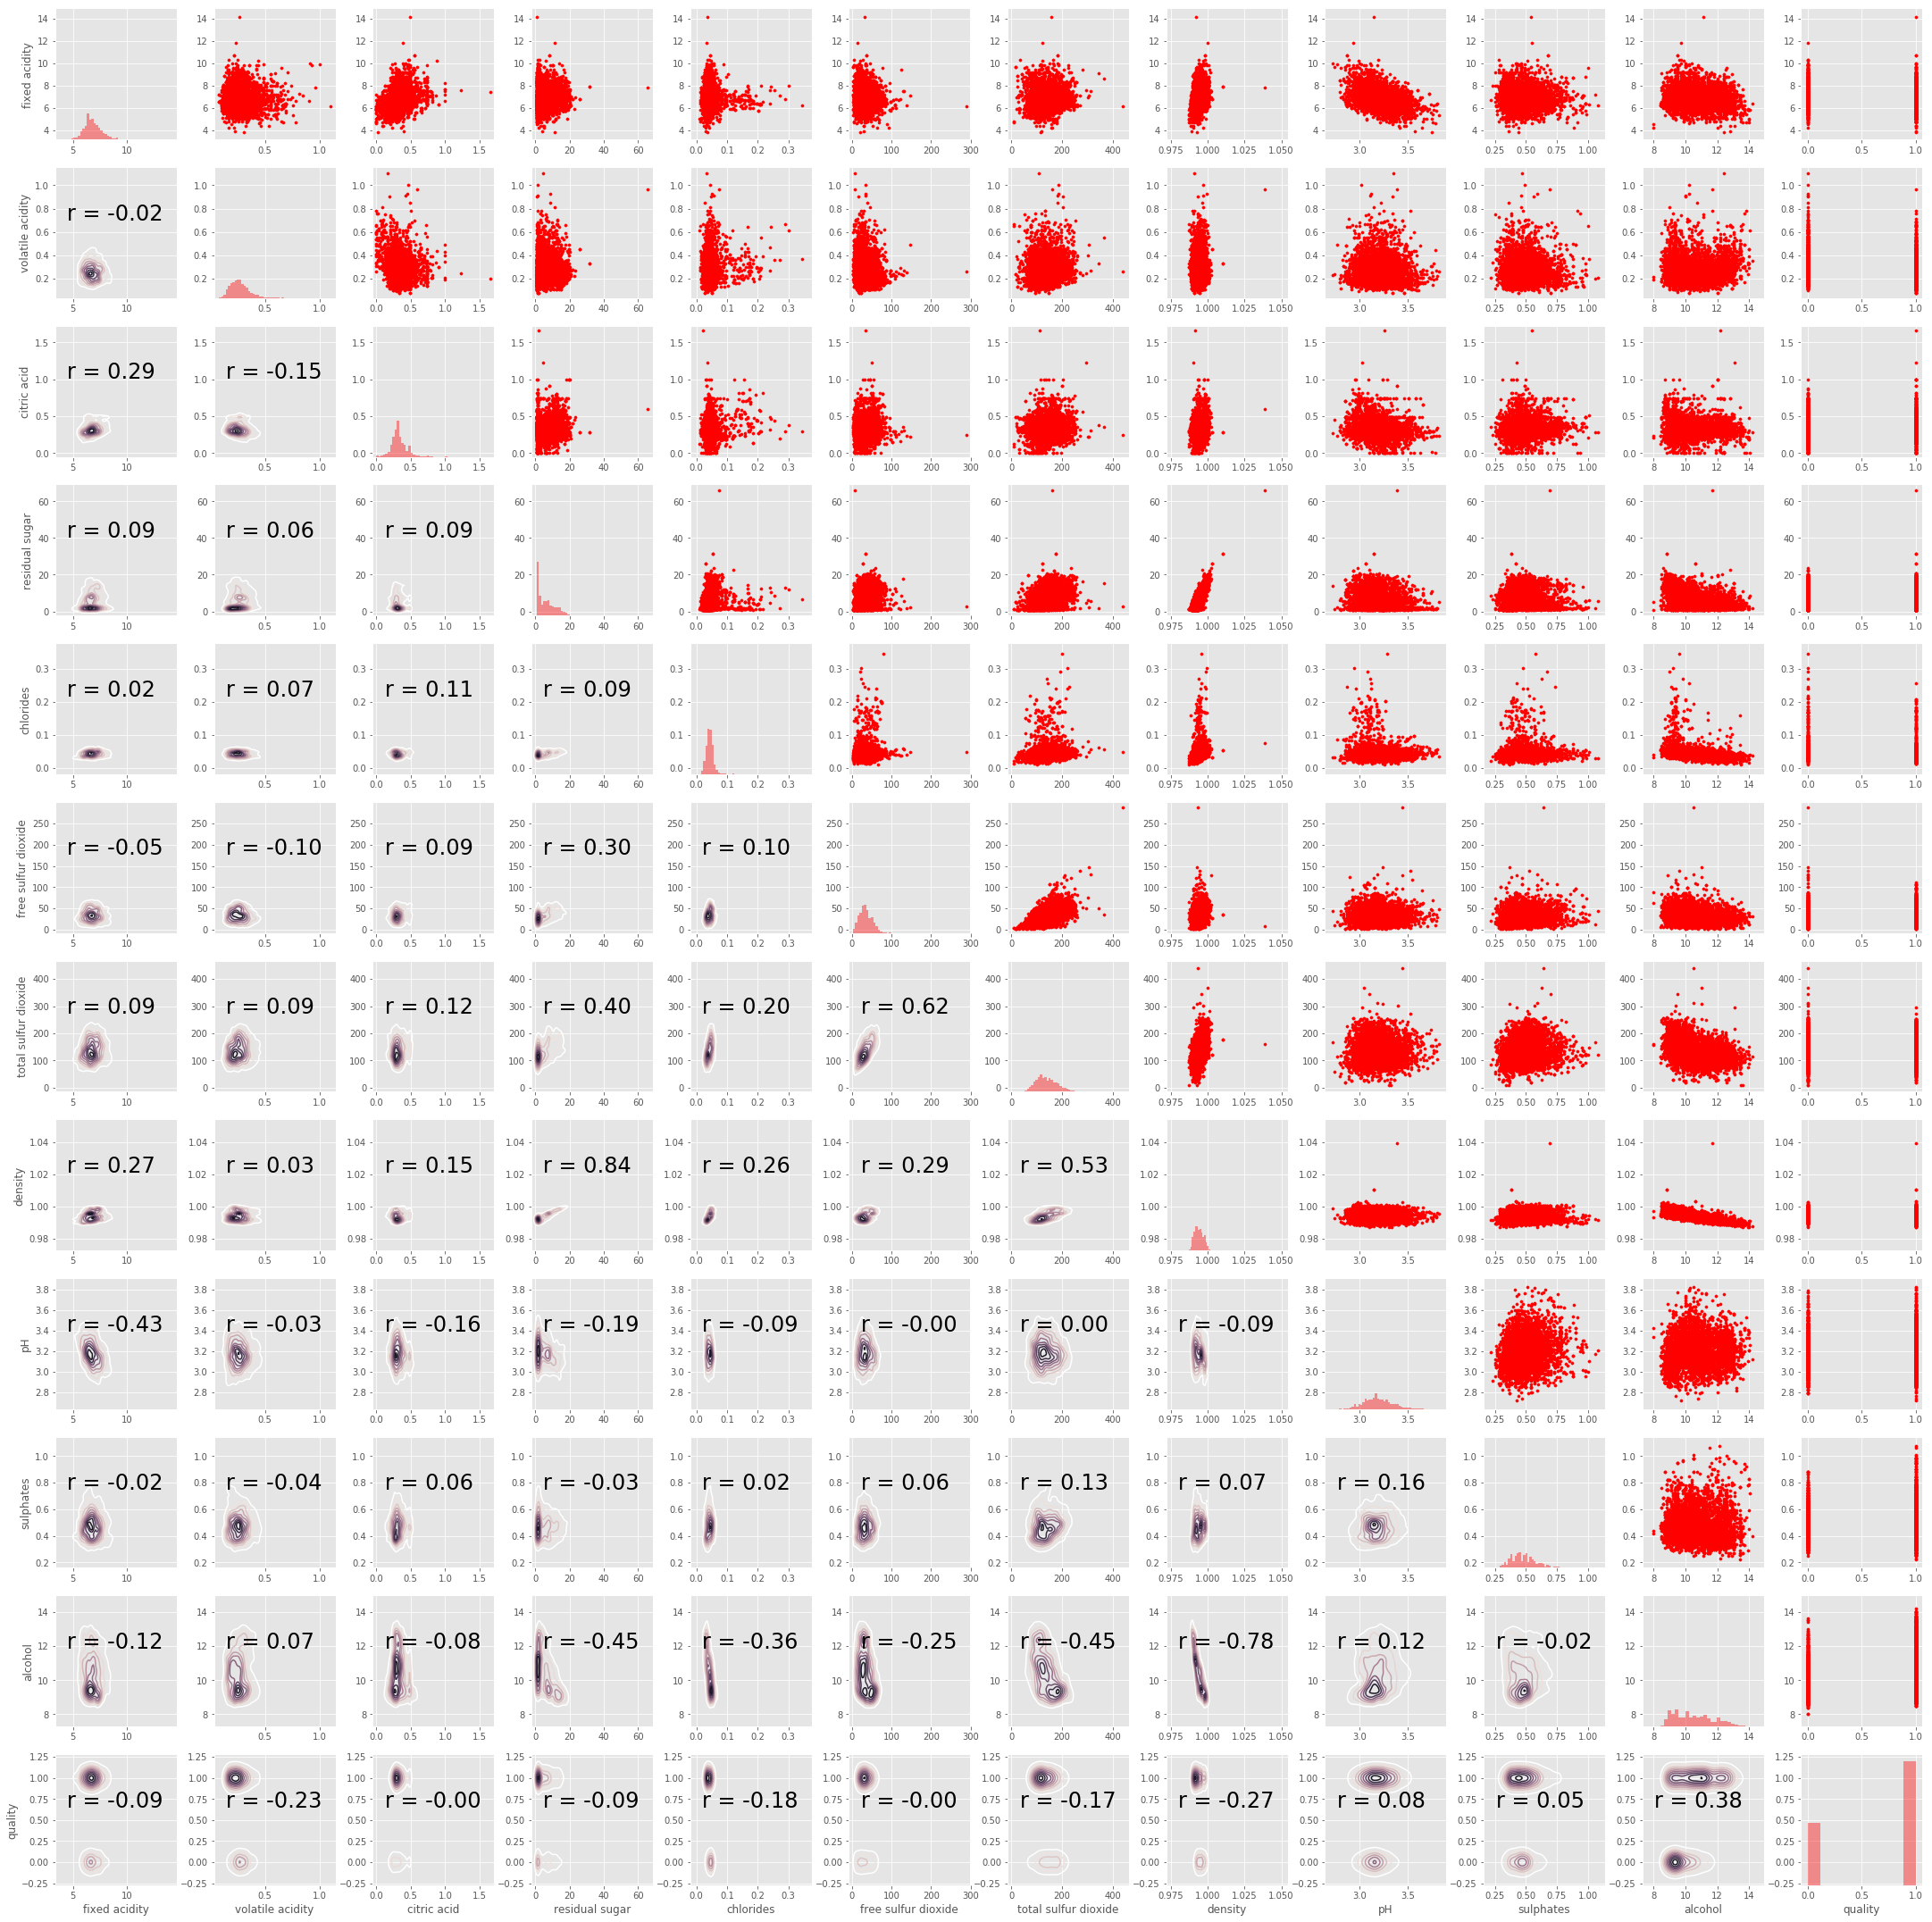

In [133]:
import seaborn as sns
from scipy import stats
%matplotlib inline

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r),
               xy=(.1, .6), xycoords=ax.transAxes,
                size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = .1,
                            hue = .5, as_cmap=True)

sns.set_context(font_scale=2)

g = sns.PairGrid(df)

g.map_upper(plt.scatter, s=10, color = 'red')

g.map_diag(sns.distplot, kde=False, color = 'red')
  
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [6]:
df = df.drop(['density', 'free sulfur dioxide', 'total sulfur dioxide'], axis = 1)

We will drop these features as they have high correlation with another feature. For example alcohol and density have a correlation of -.78 implies that they are very correlated and keeping both features does not add much information

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,alcohol,quality
427,6.8,0.290,0.50,13.30,0.053,3.09,0.45,9.400000,0
3641,6.0,0.250,0.40,5.70,0.052,3.16,0.88,10.500000,1
4809,6.0,0.260,0.24,1.30,0.053,3.21,0.62,10.400000,1
2392,6.4,0.170,0.34,1.50,0.091,3.25,0.49,9.600000,1
2615,6.5,0.180,0.41,14.20,0.039,3.28,0.72,10.300000,1
2937,7.7,0.250,0.30,7.80,0.038,3.10,0.50,10.100000,0
3918,6.4,0.350,0.28,1.60,0.037,3.12,0.40,14.200000,1
1765,6.9,0.290,0.23,8.60,0.056,3.17,0.44,8.800000,0
4418,6.6,0.220,0.23,17.30,0.047,3.08,0.46,8.800000,1
4663,6.0,0.170,0.33,6.00,0.036,3.32,0.58,10.133333,1


In [47]:
X = df.iloc[:, :8].values
y = df.iloc[:, 8].values


In [50]:
knn = knn()

In [51]:
X_train, X_test, y_train, y_test = partition(X, y, .8)
knn.fit(X_train, y_train, 5, 'euclid')

In [52]:
y_pred = knn.predict(X_train)

In [53]:
print("Accuracy: %.3f" % accuracy(y_train, y_pred))

print("F1 Score: %.3f" % f1_score(y_train, y_pred))

Accuracy: 0.825
F1 Score: 0.873


In [54]:
X_train_df = pd.DataFrame(X_train, columns = df.columns.values[:8])
scaled_X_train_df = pd.DataFrame(columns = df.columns.values[:8])
summary = X_train_df.describe()
for name in X_train_df.columns.values:
    scaled_X_train_df[name] = X_train_df[name].transform(lambda x: (x-summary[name]['mean'])/summary[name]['std'])
    
scaled_X_train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,alcohol
0,-0.547447,2.230900,-1.135736,-0.796345,0.602537,-0.054923,-0.792154,-1.059437
1,-2.102544,2.432103,-2.301480,-0.737031,0.280547,0.874040,-0.528013,-0.977983
2,0.050667,-0.384741,0.113276,-1.073145,0.280547,1.736649,-0.439966,-0.407808
3,-0.547447,0.218869,-0.303061,-0.826002,-0.363433,0.077786,1.144882,-0.489261
4,-1.265184,0.218869,0.696148,-1.053373,-0.455430,-0.585759,-0.263872,1.709986
5,0.529159,0.420072,-0.719398,0.152684,0.464541,-0.718468,-0.175825,-1.385251
6,-0.427824,-0.485342,0.446346,-0.895202,-0.455430,0.011432,-0.528013,1.139811
7,0.529159,-1.189553,0.113276,-0.974288,-0.455430,0.542268,0.176364,-0.244901
8,-0.786693,-1.290154,1.279020,-1.092916,-0.593426,0.741331,1.849259,-0.896530
9,-0.547447,-0.284139,1.945160,-1.073145,0.740532,-1.249304,-0.792154,-0.815076


In [55]:
scaled_X_train = scaled_X_train_df.iloc[:, :].values
scaled_X_train

array([[-0.547447  ,  2.23089958, -1.13573551, ..., -0.05492284,
        -0.79215421, -1.05943676],
       [-2.10254395,  2.43210267, -2.30147961, ...,  0.87404029,
        -0.52801292, -0.97798315],
       [ 0.0506672 , -0.38474057,  0.11327602, ...,  1.7366489 ,
        -0.43996582, -0.40780788],
       ...,
       [ 0.52915857, -0.88774829, -0.55286347, ..., -1.64743105,
        -0.70410711, -1.38525119],
       [ 0.17029005, -0.48534211,  0.69614806, ...,  2.06842144,
         0.88074065, -0.24490066],
       [ 0.28991289, -0.98834983,  3.36070599, ...,  1.27216734,
         1.58511743, -1.22234398]])

In [56]:
X_test_df = pd.DataFrame(X_test, columns = df.columns.values[:8])
scaled_X_test_df = pd.DataFrame(columns = df.columns.values[:8])
for name in X_train_df.columns.values:
    scaled_X_test_df[name] = X_test_df[name].transform(lambda x: (x-summary[name]['mean'])/summary[name]['std'])
    
scaled_X_test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,alcohol
0,-0.667070,0.822478,-1.135736,-0.875431,0.096552,-0.121277,0.176364,-0.733622
1,-0.068956,-0.082936,-0.636131,1.912340,0.142551,-0.253986,0.088317,-0.977983
2,0.529159,-0.384741,0.779415,-0.875431,-1.145409,-0.718468,0.616599,1.384172
3,-0.068956,-0.787147,-0.552863,-1.033602,-0.547428,-0.320341,-1.056296,0.976903
4,-0.427824,0.822478,0.196543,0.053826,6.398356,-0.121277,-0.616060,-0.977983
5,1.725387,-0.686545,2.028427,2.110055,0.142551,-1.182949,0.176364,-0.977983
6,1.246896,0.721876,-0.802666,1.813483,1.200518,-1.050240,0.880741,-0.000540
7,-0.188578,-0.585944,0.446346,-1.033602,0.142551,2.068421,-0.175825,-0.407808
8,-0.786693,-0.082936,-0.136526,-0.025259,0.096552,0.144141,0.968788,0.406728
9,-0.068956,-0.988350,-0.802666,0.666741,0.556538,-0.386695,0.176364,0.080914


In [57]:
scaled_X_test = scaled_X_test_df.iloc[:, :].values
scaled_X_test

array([[-0.66706985,  0.82247796, -1.13573551, ..., -0.12127734,
         0.17636386, -0.73362232],
       [-0.06895564, -0.08293593, -0.6361309 , ..., -0.25398636,
         0.08831677, -0.97798315],
       [ 0.52915857, -0.38474057,  0.7794155 , ..., -0.71846792,
         0.61659935,  1.38417152],
       ...,
       [ 0.28991289, -0.28413902,  0.44634576, ...,  0.60862225,
        -0.52801292,  1.38417152],
       [-2.22216679, -0.38474057, -1.05246808, ...,  3.32915711,
         1.14488194,  0.97690348],
       [-0.90631553,  0.01766561, -0.88593321, ..., -1.44836752,
         1.84925872,  2.11725401]])

In [84]:
knn = knn()
knn.fit(scaled_X_train, y_train, 5, 'euclid')
#y_pred_scaled = knn.predict(scaled_X_train)

In [59]:
print("Accuracy: %.3f" % accuracy(y_train, y_pred_scaled))

print("F1 Score: %.3f" % f1_score(y_train, y_pred_scaled))

Accuracy: 0.841
F1 Score: 0.884


In [60]:
def sFold(folds, data, labels, model, model_args, error_function):
    neighbors = model_args['k']
    distances = model_args['distance']
    cv_table = {'k': [], 'distance': [], 'expected labels': [], 'predicted labels': [], error_function: []}
    partitions = s_partition(folds, data, labels)
    for n_neighbors in neighbors:
        for d in distances:
            for i in range(folds):
                scores = []
                training_folds = np.concatenate([partitions[j] for j in range(len(partitions)) if j != i], axis = 0)
                test_fold = partitions[i]
                X_tr = training_folds[:, :(training_folds.shape[1]-1)]
                y_tr = training_folds[:, (training_folds.shape[1]-1)]
                X_val = test_fold[:, :(test_fold.shape[1]-1)]
                y_val = test_fold[:, (test_fold.shape[1]-1)]
                
                model.fit(X_tr, y_tr, n_neighbors, d)
                
                y_predict = model.predict(X_val)
                
                if error_function == 'f1':
                    score = f1_score(y_val, y_predict)
                
                if error_function == 'accuracy':
                    score = accuracy(y_val, y_predict)
                    
                if error_function == 'precision':
                    score = precision(y_val, y_predict)
                    
                if error_function == 'recall':
                    score = recall(y_val, y_predict)
                    
                scores.append(score)
                scores = np.array(scores)
                
            cv_table[error_function].append(np.mean(scores))
            cv_table['k'].append(n_neighbors)
            cv_table['distance'].append(d)
            cv_table['expected labels'].append(y_val)
            cv_table['predicted labels'].append(y_predict)
            
    return cv_table
            
def s_partition(folds, data, labels):
    partitions = []
    
    indices = np.random.permutation(data.shape[0])
    
    fold_size = int(np.floor(len(data)/folds))
    for k in range(folds):
        X_partition = X[indices[k*fold_size:(k+1)*fold_size]]
        y_partition = y[indices[k*fold_size:(k+1)*fold_size]]
        y_partition = np.array([y_partition])
        partition = np.concatenate((X_partition, y_partition.T), axis = 1)
        
        partitions.append(partition)
        
    return partitions


In [85]:
params = {'k': [1,5,9,11], 'distance': ['euclid', 'manhattan']}
table = sFold(3, scaled_X_train, y_train, knn, params, 'f1')

In [86]:
cv = pd.DataFrame.from_dict(table)

In [87]:
cv

,distance,expected labels,f1,k,predicted labels
0,euclid,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.795699,1,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
1,manhattan,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.799097,1,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
2,euclid,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.795114,5,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
3,manhattan,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.807076,5,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
4,euclid,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.812088,9,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ..."
5,manhattan,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.807289,9,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
6,euclid,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.807882,11,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ..."
7,manhattan,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",0.812328,11,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."


In [110]:
knn_cv = KNN()
knn_cv.fit(scaled_X_train, y_train, 11, 'manhattan')

In [111]:
y_pred = knn_cv.predict(scaled_X_test)

In [130]:
print("Accuracy: %.3f" % accuracy(y_test, y_pred))
print("Recall: %.3f" % recall(y_test, y_pred))
print("Precision: %.3f" % precision(y_test, y_pred))
print("F1 Score: %.3f" % f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.754
Recall: 0.873
Precision: 0.777
F1 Score: 0.822
Confusion Matrix:
[[182 160]
 [ 81 557]]


In [113]:
p = generalization_error(y_test, y_pred)
std_err = np.sqrt(p*(1-p)/len(y_test))
conf_int = (p-1.96*std_err, p+1.96*std_err)
print("95% Confidence Interval: ")
print(conf_int)

95% Confidence Interval: 
(0.21895664088371775, 0.2728800938101597)


In [114]:
y_scores = get_y_scores(knn_cv, scaled_X_train, y_train)

In [115]:
tpr, fpr = roc(y_train, y_scores)

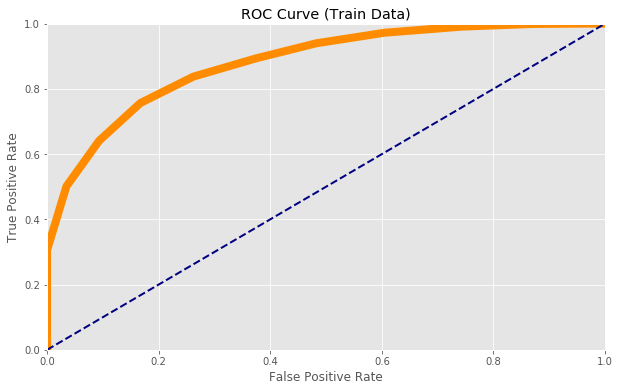

In [116]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
plot_roc_curve(fpr, tpr)

In [117]:
auc_score(y_train, y_scores)

0.8798862607181923

In [124]:
df_2 = pd.read_csv('C:/Users/Henry/CSCE 478/Datasets/DataScienceRepository/winequality-white.csv')

In [125]:
summary_stats = df_2.describe()
summary_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [126]:
summary_stats.to_excel('C:/Users/Henry/CSCE 478/summary_stats.xlsx')

In [118]:
cv.to_excel('C:/Users/Henry/CSCE 478/cv_table.xlsx')

In [119]:
knn2 = KNN()
knn2.fit(scaled_X_train, y_train, 9, 'euclid')
y_pred2 = knn2.predict(scaled_X_test)
print("Accuracy: %.3f" % accuracy(y_test, y_pred2))
print("Recall: %.3f" % recall(y_test, y_pred2))
print("Precision: %.3f" % precision(y_test, y_pred2))
print("F1 Score: %.3f" % f1_score(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.738
Recall: 0.851
Precision: 0.770
F1 Score: 0.809
Confusion Matrix:
[[180 162]
 [ 95 543]]


In [124]:
knn3 = KNN()
knn3.fit(scaled_X_train, y_train, 1, 'euclid')
y_pred3 = knn3.predict(scaled_X_train)
print("Accuracy: %.3f" % accuracy(y_train, y_pred3))
print("F1 Score: %.3f" % f1_score(y_train, y_pred3))

Accuracy: 1.000
F1 Score: 1.000


In [128]:
def cm(y_test, y_pred):
    tps = int(np.matmul(y_test, y_pred))
    fps = int((sum(y_pred) - tps))
    fns = int((sum(y_test) - tps))
    tns = int((len(y_test) - tps - fns - fps))
    
    cm = np.array([[tns, fps], [fns, tps]])
    
    return cm

cm(y_test, y_pred)

array([[182, 160],
       [ 81, 557]])